# **Post Analysis for JUMP Camp**

JUMP Camp is a project that was executed by the University of San Carlos - Computer Engineering Council throughout the month of April that seeked to educate and develop the technical skills of the youth especially in basic and fundamental computer skills such as General Computer Knowledge, Word Processing, Spreadsheets, Email, Computer Conferencing, Mail Groups, and WWW. This Exploratory Data Analysis project aims to prove the efficacy and efficiency of the program in improving particpants' technical skills.

The project seeks to answer the following questions:
1. What is the average cumulative score of the respondents per category after the program?
2. What is the distribution of scores for each category and the overall test?
3. How did each age group improve after the program?

# **Setup**
Next cell imports all Python libraries needed for the project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

# **Import dataset**

The dataset contains the age of the respondent, and a their total scores per category for the pre-test and post-test. GCK means General Computer Knowledge, WP means Word Processing, and SS means Spreadsheets. 

In [2]:
post_test_data = pd.read_csv('../data/jump_camp_post_results.csv')
post_test_data

,age,pre_test_gck,post_test_gck,pre_test_wp,post_test_wp,pre_test_ss,post_test_ss
0,18.0,5.0,7,8.0,9.0,2.0,10.0
1,16.0,7.0,9,9.0,9.0,3.0,10.0
2,17.0,3.0,6,4.0,5.0,0.0,4.0
3,17.0,1.0,6,0.0,NaN,0.0,NaN
4,15.0,2.0,0,1.0,1.0,0.0,8.0
5,NaN,2.0,5,4.0,NaN,0.0,NaN
6,13.0,4.0,5,6.0,2.0,0.0,4.0
7,14.0,3.0,6,2.0,NaN,0.0,3.0
8,15.0,4.0,2,5.0,6.0,0.0,6.0
9,NaN,1.0,8,1.0,8.0,0.0,8.0


# **Data Preprocessing**

Check if there are any missing values in the datasets.

In [3]:
# Checking if there are any missing values in the post test dataset.
post_test_data_nan_cnt = post_test_data.isna().sum()
post_test_data_nan_cnt 

age              8
pre_test_gck     4
post_test_gck    0
pre_test_wp      4
post_test_wp     6
pre_test_ss      4
post_test_ss     6
dtype: int64

There are `NaN` values found in the dataset within age, and the total score results for each category except for General Computer Knowledge Post Test. 

Since there are missing values in the dataset, a statistical method called Median Imputation will be used to fill those gaps. Median imputation is a method of handling missing data in which missing values are replaced with the median value of the non-missing values for that variable. This approach is a type of single imputation method, meaning that it provides a single estimate for each missing value based on the available data. One reason to use median imputation is that it can help to preserve the distribution of the variable being imputed, which is important in cases where the variable is highly skewed or contains outliers. 

In [4]:
# Filling in missing values for each column using the median.

for column in post_test_data:
    column_median = post_test_data[column].median()
    post_test_data[column].fillna(value=column_median, inplace=True)
    post_test_data[column] = post_test_data[column].astype(int)
post_test_data

,age,pre_test_gck,post_test_gck,pre_test_wp,post_test_wp,pre_test_ss,post_test_ss
0,18,5,7,8,9,2,10
1,16,7,9,9,9,3,10
2,17,3,6,4,5,0,4
3,17,1,6,0,6,0,8
4,15,2,0,1,1,0,8
5,15,2,5,4,6,0,8
6,13,4,5,6,2,0,4
7,14,3,6,2,6,0,3
8,15,4,2,5,6,0,6
9,15,1,8,1,8,0,8


There are no longer `NaN` values in the dataset and we could proceed with analyis.

# **Plots and Analysis**

### 1. What is the average cumulative score of the respondents per category after the program?

In [5]:
# Setting up dictionary for means

pre_means = {'General Computer Knowledge': None, 
             'Word Processing': None, 
             'Spreadsheets': None,
            }
post_means = {'General Computer Knowledge': None, 
             'Word Processing': None, 
             'Spreadsheets': None,
            }

In [6]:
# Calculating the average score per column before JUMP Camp

pre_keys = list(pre_means.keys())
post_keys = list(post_means.keys())
pre_current_key = 0
post_current_key = 0
for column in post_test_data.columns[1::1]:
    if "pre" in column:
        pre_means[pre_keys[pre_current_key]] = post_test_data[column].mean()
        pre_current_key+=1
    else:
        post_means[post_keys[post_current_key]] = post_test_data[column].mean()
        post_current_key+=1

In [7]:
print("Average Cumulative Scores before JUMP Camp:")
for key in pre_means.keys():
    print(f"{key}: {pre_means[key]}")
print()
print("Average Cumulative Scores after JUMP Camp:")
for key in post_means.keys():
    print(f"{key}: {post_means[key]}")

Average Cumulative Scores before JUMP Camp:
General Computer Knowledge: 3.65
Word Processing: 4.45
Spreadsheets: 0.7

Average Cumulative Scores after JUMP Camp:
General Computer Knowledge: 5.55
Word Processing: 6.1
Spreadsheets: 7.55


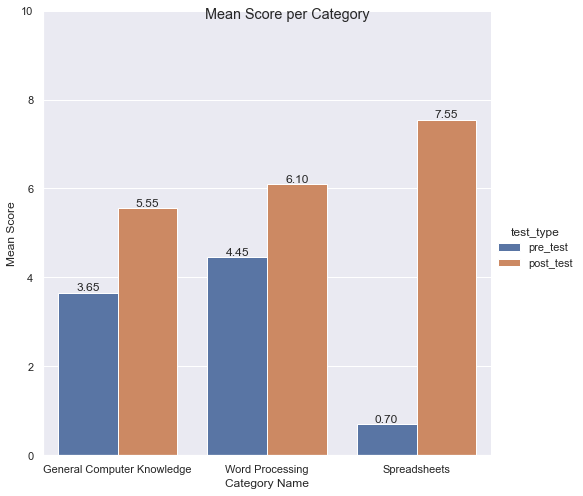

In [8]:
# Plot a bar plot for mean score per category

pre_mean_data = pd.Series(pre_means)
post_mean_data = pd.Series(post_means)
df = pd.concat([pre_mean_data.rename("pre_test"), post_mean_data.rename("post_test")], axis=1)
df = pd.melt(df.reset_index(), id_vars='index', var_name="test_type", value_name="mean_score")
g = sns.catplot(x='index', y='mean_score', hue='test_type', data=df, kind='bar', height=7, aspect=1)
g.set(ylim=(0, 10))
g.fig.suptitle("Mean Score per Category")
g.set_xlabels("Category Name")
g.set_ylabels("Mean Score")
ax = g.facet_axis(0, 0) 
for c in ax.containers:
    labels = [f'{v.get_height():.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [9]:
print("Percent Change of Scores per Category")
for key in pre_means.keys():
    pct = ((post_means[key] - pre_means[key]) / pre_means[key]) * 100
    print(f"{key}: {pct:.2f}%")

Percent Change of Scores per Category
General Computer Knowledge: 52.05%
Word Processing: 37.08%
Spreadsheets: 978.57%


Similar to the needs analysis, the averages here are represented by the amount of `Yes` answers in the questions of each category. Before JUMP Camp, participants scored the highest in Word Processing, followed by General Computer Knowledge, then by Spreadsheets. However after JUMP Camp, partcipants were able to score the highest in Spreadsheets, followed by Word Processing then by General Computer Knowledge. 

In terms of percent change, the order changes slightly. At a whopping 978.57% increase in confidence, participants were able to grasp multiple concepts in Spreadsheeting. Succeedingly, General Computer Knowledge and Word Processing increased by 52.05% and 37.08% respectively. According to Relevant Insights, this change is significant since in a smaller dataset, at least a 10% change is needed to conclude significance.

### 2. What is the distribution of scores for each category and the overall test?

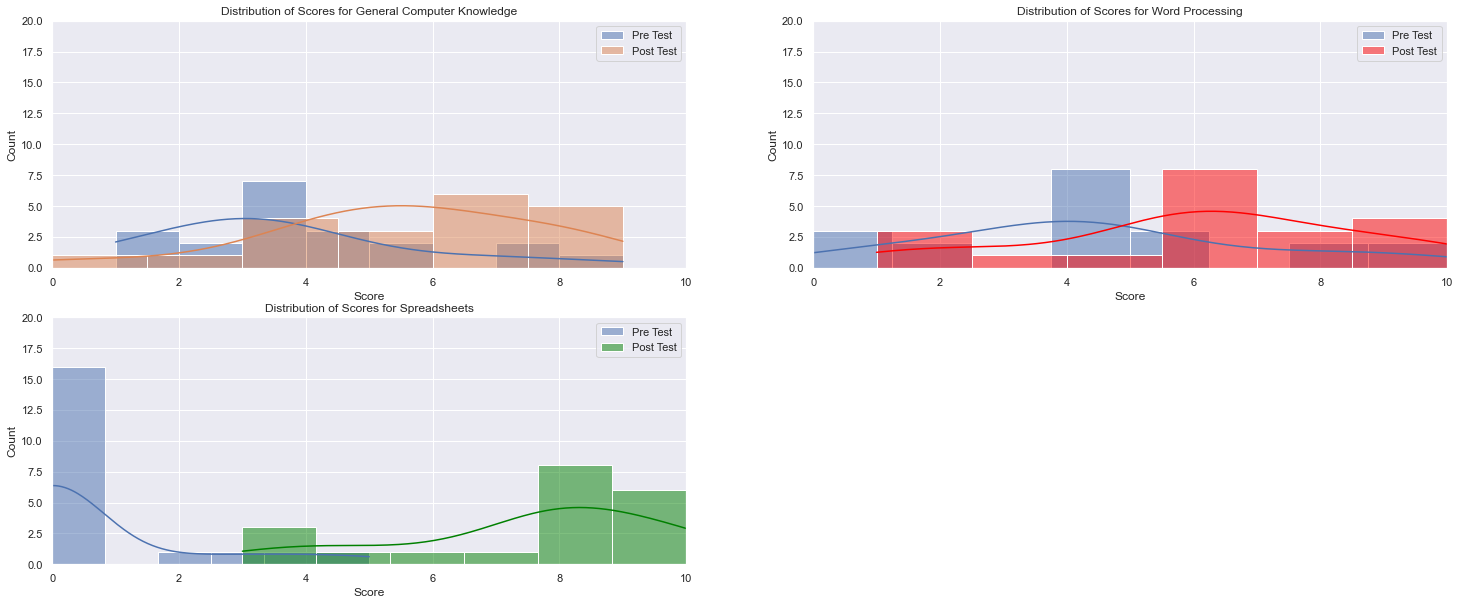

In [10]:
# Plot distribution plots for each category

fig, ax = plt.subplots(1, 3, figsize=(25,10))

plt.subplot(2, 2, 1)
plt.title("Distribution of Scores for General Computer Knowledge")
g = sns.histplot(data=post_test_data['pre_test_gck'], kde=True, label="Pre Test")
g.set_xlim(0, 10)
g.set_ylim(0, len(post_test_data.index))
g.set_xlabel("Score")
g.set_ylabel("Count")
g = sns.histplot(data=post_test_data['post_test_gck'], kde=True, label="Post Test")
g.set_xlim(0, 10)
g.set_ylim(0, len(post_test_data.index))
g.set_xlabel("Score")
g.set_ylabel("Count")
plt.legend()

plt.subplot(2, 2, 2)
plt.title("Distribution of Scores for Word Processing")
g = sns.histplot(data=post_test_data['pre_test_wp'], kde=True, label="Pre Test")
g.set_xlim(0, 10)
g.set_ylim(0, len(post_test_data.index))
g.set_xlabel("Score")
g.set_ylabel("Count")
g = sns.histplot(data=post_test_data['post_test_wp'], kde=True, color="red", label="Post Test")
g.set_xlim(0, 10)
g.set_ylim(0, len(post_test_data.index))
g.set_xlabel("Score")
g.set_ylabel("Count")
plt.legend()

plt.subplot(2, 2, 3)
plt.title("Distribution of Scores for Spreadsheets")
g = sns.histplot(data=post_test_data['pre_test_ss'], kde=True, label="Pre Test")
g.set_xlim(0, 10)
g.set_ylim(0, len(post_test_data.index))
g.set_xlabel("Score")
g.set_ylabel("Count")
g = sns.histplot(data=post_test_data['post_test_ss'], kde=True, color="green", label="Post Test")
g.set_xlim(0, 10)
g.set_ylim(0, len(post_test_data.index))
g.set_xlabel("Score")
g.set_ylabel("Count")
plt.legend()

In [11]:
skewness = post_test_data.loc[:, "pre_test_gck":"post_test_ss"].skew()
kurtosis = post_test_data.loc[:, "pre_test_gck":"post_test_ss"].kurtosis()

print("Skewness for each category:")
print(skewness)
print()
print("Kurtosis for each category:")
print(kurtosis) 

Skewness for each category:
pre_test_gck     1.038078
post_test_gck   -0.690135
pre_test_wp      0.478364
post_test_wp    -0.411079
pre_test_ss      2.049000
post_test_ss    -0.856689
dtype: float64

Kurtosis for each category:
pre_test_gck     0.991027
post_test_gck    0.751180
pre_test_wp     -0.134190
post_test_wp    -0.298941
pre_test_ss      3.070415
post_test_ss    -0.114583
dtype: float64


Based on skewness, values from pre-test to post-test are getting closer to zero. According to SPCForExcel, it indicates that there has been a shift in the central tendency of the distribution or a change in the proportion of values at the extremes of the distribution. Approaching central tendency means that the participant scores are clustering around the mean or median of the distribution. In general, this can be seen as a desirable outcome because it suggests that the majority of participants are performing at a level that is consistent with the overall performance of the group.

Based on the kurtosis, the pre-tests, with the exception of Word Processing, exhibit leptokurtic distributions, meaning they have heavier tails. Conversely, Word Processing has a mesokurtic distribution, which indicates it has a similar degree of peakedness as a normal distribution. On the other hand, the post-tests, with the exception of General Computer Knowledge, have approximately mesokurtic distributions, indicating they are close to normality. Meanwhile, General Computer Knowledge has a leptokurtic distribution, indicating it has a more peaked shape than a normal distribution. These differences in the shape of the distributions suggest that the participant's performance may vary across different categories.

### 3. How did each age group improve after the program?

In [12]:
# Getting total score per person for pre and post test
post_test_data['pre_total'] = post_test_data.iloc[:,1::2].sum(axis=1)
post_test_data['post_total'] = post_test_data.iloc[:, 2:7:2].sum(axis=1)
post_test_data

,age,pre_test_gck,post_test_gck,pre_test_wp,post_test_wp,pre_test_ss,post_test_ss,pre_total,post_total
0,18,5,7,8,9,2,10,15,26
1,16,7,9,9,9,3,10,19,28
2,17,3,6,4,5,0,4,7,15
3,17,1,6,0,6,0,8,1,20
4,15,2,0,1,1,0,8,3,9
5,15,2,5,4,6,0,8,6,19
6,13,4,5,6,2,0,4,10,11
7,14,3,6,2,6,0,3,5,15
8,15,4,2,5,6,0,6,9,14
9,15,1,8,1,8,0,8,2,24


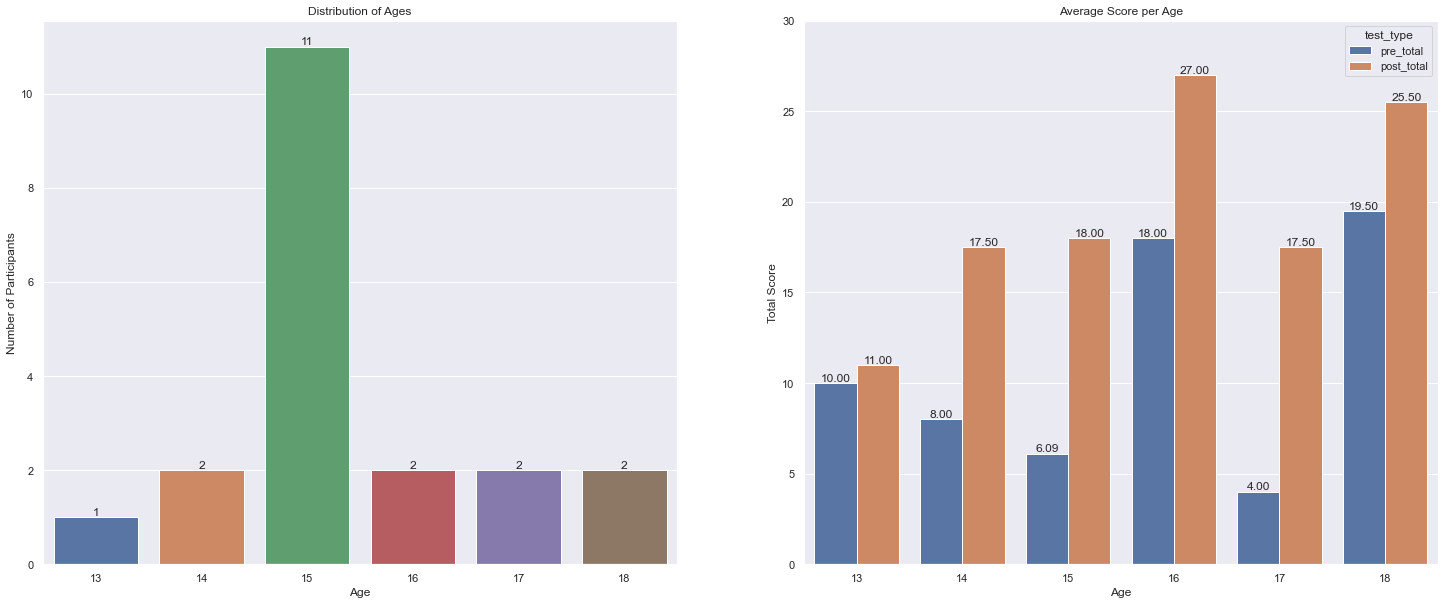

In [13]:
# Plot distribution of ages and average score per age

fig, ax = plt.subplots(1, 2, figsize=(25,10))

plt.subplot(1, 2, 1)
plt.title("Distribution of Ages")
g = sns.countplot(x=post_test_data["age"])
g.bar_label(g.containers[0])
g.set_ylabel("Number of Participants")
g.set_xlabel("Age")

plt.subplot(1, 2, 2)
plt.title("Average Score per Age")
age_group = post_test_data.groupby("age", as_index=False).mean()
age_group.drop(age_group.iloc[:, 1:7], inplace=True, axis=1)
age_df = age_group.copy()
age_group = pd.melt(age_group, id_vars='age', var_name="test_type", value_name="total_score")
g = sns.barplot(data=age_group, x="age", y="total_score", hue="test_type")
g.set_ylim(0, 30)
g.set_ylabel("Total Score")
g.set_xlabel("Age")
for container in g.containers:
    g.bar_label(container, fmt='%.2f')

In [14]:
print("Percent Change of Scores per Age")
for index, row in age_df.iterrows():
    pct = ((row['post_total'] - row['pre_total']) / row['pre_total']) * 100
    print(f"{row['age']:.0f} year olds: {pct:.2f}%")

Percent Change of Scores per Age
13 year olds: 10.00%
14 year olds: 118.75%
15 year olds: 195.52%
16 year olds: 50.00%
17 year olds: 337.50%
18 year olds: 30.77%


Based on the average score per age, all ages except for 13 year olds have scored more than 50% in their total scores across all categories. 17 year olds have seen the greatest improvement with a 337.50% increase in their total scores. Following them are 15 year olds at 195.52%, 14 year olds at 118.75%, 16 year olds at 50.00%, 18 year olds at 30.77%, and 13 year olds at 10.00%. However similar to the needs analysis, accuracy might be a problem due to the inequal amount of sample size per age.

# **Conclusion**

Therefore, JUMP Camp has been proven to be effective based on the following proof:
1. An average of 355.96% increase in scores per category.
2. An average of 123.76% increase in scores per age.
3. Majority of participants' performance is now consistent with the entire group.

# **Recommendations**

1. Greater sample size to ensure accuracy in the interpretation of data without bias.